In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pydna.utils import parse_text_table

In [2]:
data = """\
Time (h)	OD600
0.000	    0.1000
13.183	    0.1620
15.917	    0.2800
18.000	    0.4600
19.833	    0.5600
21.750	    0.6200
23.750	    0.8000
27.500	    1.1800
32.750	    2.0200
41.500	    4.7200
44.167	    5.7200
48.833	    6.0400
53.283	    5.9600
"""

In [3]:
*r, cr = parse_text_table(data)

In [4]:
# Data input
xData = np.array(cr[0][1:], dtype="f")
yData = np.array(cr[1][1:], dtype="f")

In [5]:
xData

array([ 0.   , 13.183, 15.917, 18.   , 19.833, 21.75 , 23.75 , 27.5  ,
       32.75 , 41.5  , 44.167, 48.833, 53.283], dtype=float32)

In [6]:
yData

array([0.1  , 0.162, 0.28 , 0.46 , 0.56 , 0.62 , 0.8  , 1.18 , 2.02 ,
       4.72 , 5.72 , 6.04 , 5.96 ], dtype=float32)

In [7]:
np.e

2.718281828459045

In [11]:
def mgomb(t, A, Tlag, µm):
    """
    Gompertz (Tjørve 2017).

    A = upper asymptote
    t = time
    µm = growth-rate coefficient
    Tlag =
    """
    return A*np.exp(-np.exp((np.e*µm/A)*(Tlag-t)+1))

    # =$C$18+$D$11*EXP(-EXP(($D$12*EXP(1))/$D$11*($D$13-B19)+1))

    # = c + A*EXP(-EXP( ($D$12*EXP(1))/$D$11*($D$13-B19)+1 ))

    =$C$18+$D$11*EXP(-EXP(($D$12*EXP(1))/$D$11*($D$13-B19)+1))


    =$C$18+$D$11*EXP(-EXP((($D$12*EXP(1))/$D$11)*($D$13-B30)+1))


    = constant + A * EXP(-EXP(((µm *EXP(1))/$D$11)*($D$13-B30)+1))

In [17]:
# curve fit the test data
fittedParameters, pcov = curve_fit(mgomb, 
                                   xData, 
                                   yData,
                                   bounds=([0.01, 20.0, 0.01], [8.0, 25.0, 1.0]))

In [18]:
A, Tlag, µm = fittedParameters

In [19]:
A, Tlag, µm

(7.7192301177360765, 22.244029311048934, 0.2459355869158096)

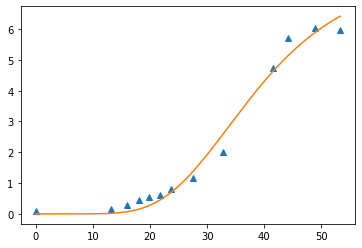

In [20]:
fig, ax = plt.subplots()
ax.plot(xData, yData, "^")
t = np.arange(min(xData), max(xData), 0.01)
ax.plot(t, mgomb(t, A, Tlag, µm))
plt.show()

In [21]:
def exp_growth(t, x0, µmax):
    # x0 initial optical density
    # t = time (h)
    # µmax maximum growth rate (1/h)
    return x0 * np.exp(µmax * t)

In [46]:
first_data_point = 8

In [47]:
number_of_datapoints = 3

In [50]:
xSelection = xData[first_data_point:first_data_point+number_of_datapoints]

In [51]:
ySelection = yData[first_data_point:first_data_point+number_of_datapoints]

In [52]:
fittedParameters, pcov = curve_fit(exp_growth, 
                                   xSelection,
                                   ySelection,
                                   bounds=([0.0, 0.0], [1.0, 1.0]))

In [53]:
x0, µmax = fittedParameters

In [57]:
x0

0.11219688754330762

In [58]:
µmax

0.08935592455733433

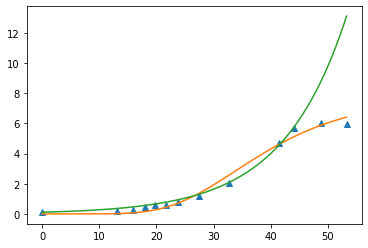

In [64]:
fig, ax = plt.subplots()
ax.plot(xData, yData, "^")
t = np.arange(min(xData), max(xData), 0.01)
ax.plot(t, mgomb(t, A, Tlag, µm))
ax.plot(t, exp_growth(t, x0, µmax))
plt.show()

In [65]:
def gomb(t, A, Ti, kg):
    """
    Gompertz (Tjørve 2017).

    A = upper asymptote
    t = time
    kg = growth-rate coefficient
    Ti = time at inflection
    """
    return A*np.exp(-np.exp(-kg*(t-Ti)))

In [66]:
# curve fit the test data
fittedParameters, pcov = curve_fit(gomb, 
                                   xData, 
                                   yData,
                                   bounds=([0.01, 0.01, 0.01], [7.0, 50.0, 1.0]))

In [67]:
A, Ti, kg = fittedParameters

In [68]:
A

6.999999999999999

In [69]:
Ti

32.46808567073663

In [70]:
kg

0.10239461304955998

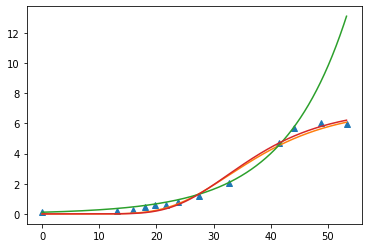

In [76]:
fig, ax = plt.subplots()
ax.plot(xData, yData, "^")
t = np.arange(min(xData), max(xData), 0.01)
ax.plot(t, mgomb(t, A, Tlag, µm))
ax.plot(t, exp_growth(t, x0, µmax))
ax.plot(t, gomb(t, A, Ti, kg))
plt.show()